# Inverse Translatation of a Stochastic Process
Author: Lohit Vandanapu
Date: May 14, 2019
Last Modified: Oct 13, 2021

In this example, a Gaussian stochastic processes is first translated into a stocahstic processes of a different distribution and subsequently, these translated samples are translated back to Gaussian samples with InverseTranslate class.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the InverseTranslation class along with the Translation class from the StochasticProcesses module of UQpy.

In [9]:
from UQpy.StochasticProcess import Translation, InverseTranslation
from UQpy.StochasticProcess import SRM
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Firstly we generate Gaussian Stochastic Processes using the Spectral Representation Method.

In [10]:
n_sim = 10000  # Num of samples
T = 100  # Time(1 / T = dw)
nt = 256  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dt = T / nt
t = np.linspace(0, T - dt, nt)
dw = F / nw
w = np.linspace(0, F - dw, nw)
S = 125 / 4 * w ** 2 * np.exp(-5 * w)
SRM_object = SRM(n_sim, S, dt, dw, nt, nw, verbose=False, random_state=128)
samples = SRM_object.samples

In [11]:
def S_to_R(S, w, t):
    dw = w[1] - w[0]
    fac = np.ones(len(w))
    fac[1: len(w) - 1: 2] = 4
    fac[2: len(w) - 2: 2] = 2
    fac = fac * dw / 3
    R = np.zeros(len(t))
    for i in range(len(t)):
        R[i] = 2 * np.dot(fac, S * np.cos(w * t[i]))
    return R

In [12]:
R = S_to_R(S, w, t)
r = R/R[0]

We translate the samples to be Uniform samples from 1 to 2

In [13]:
from UQpy.Distributions import Uniform, Lognormal

distribution = Lognormal(0.5)
samples = samples.flatten()[:, np.newaxis]

Translate_object = Translation(dist_object=distribution, time_interval=dt, frequency_interval=dw,
                               number_time_intervals=nt, number_frequency_intervals=nw, correlation_function_gaussian=R,
                               samples_gaussian=samples)
samples_ng = Translate_object.samples_non_gaussian
R_ng = Translate_object.scaled_correlation_function_non_gaussian
r_ng = Translate_object.correlation_function_non_gaussian

Plotting the actual and translated autocorrelation functions

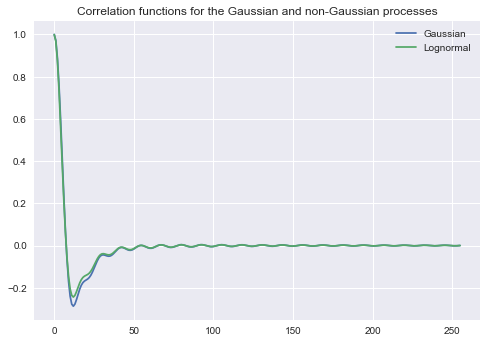

In [14]:
fig1 = plt.figure()
plt.plot(r, label='Gaussian')
plt.plot(r_ng, label='Lognormal')
plt.title('Correlation functions for the Gaussian and non-Gaussian processes')
plt.legend()
plt.show()

In [15]:
InverseTranslate_object = InverseTranslation(dist_object=distribution, time_interval=dt, frequency_interval=dw,
                                             number_time_intervals=nt, number_frequency_intervals=nw,
                                             correlation_function_non_gaussian=R_ng, samples_non_gaussian=samples_ng,
                                             percentage_error=2.0)
samples_g = InverseTranslate_object.samples_gaussian
S_g = InverseTranslate_object.power_spectrum_gaussian
R_g = InverseTranslate_object.auto_correlation_function_gaussian
r_g = InverseTranslate_object.correlation_function_gaussian

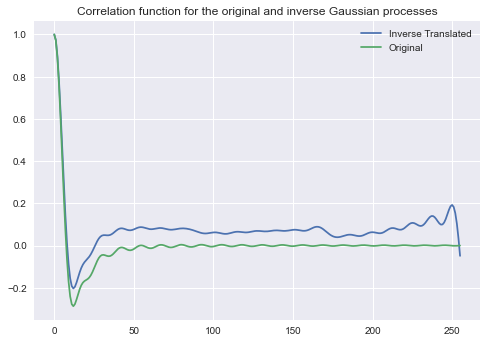

In [16]:
fig2 = plt.figure()
plt.plot(r_g, label='Inverse Translated')
plt.plot(r, label='Original')
plt.title('Correlation function for the original and inverse Gaussian processes')
plt.legend()
plt.show()